# 1. Read in the penguins dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = sns.load_dataset('penguins')

### To make a binary classification problem

In [2]:
df = df[df["species"]!="Gentoo"]

### Drop all rows that contain missing values.

In [3]:
df.dropna(axis=0, inplace=True)

<AxesSubplot:>

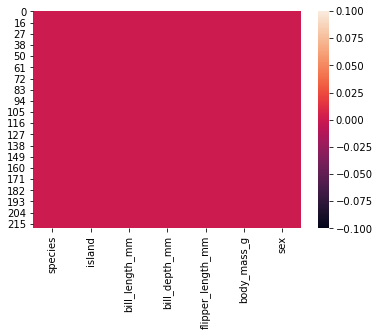

In [4]:
sns.heatmap(df.isna())

# 2. Select a target column y and features X

In [24]:
y = (df['species'] == 'Chinstrap').astype(int)
X = df[["bill_depth_mm", "bill_length_mm"]]

# 3. Define a function for the linear predictor

In [19]:
def linear_predictor(X, w):
    return w[0]+w[1]*X['bill_depth_mm']+w[2]*X['bill_length_mm']

# 4. Define a function for the sigmoid transformation

In [20]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

# 5. Define a function for the log-loss

In [21]:
def log_loss(y, probas):
    return (-1)*np.mean((y*np.log(probas))+(1-y)*np.log(1-probas))

# 6. Put everything together and minimize the loss function!

In [22]:
def logreg(w):
    probas = sigmoid(linear_predictor(X, w))
    return log_loss(y, probas)

In [23]:
from scipy.optimize import minimize

minimize(logreg, [0, 0, 0])

      fun: 0.043670794083330494
 hess_inv: array([[34925.70593527,  -198.38697919,  -733.8106043 ],
       [ -198.38697918,   407.48441868,  -163.68731703],
       [ -733.8106043 ,  -163.68731703,    84.7831301 ]])
      jac: array([-7.35744834e-08, -1.27358362e-06, -2.52109021e-06])
  message: 'Optimization terminated successfully.'
     nfev: 172
      nit: 40
     njev: 43
   status: 0
  success: True
        x: array([-24.09070254,  -3.97814367,   2.20062066])